<a href="https://colab.research.google.com/github/Hoale2908/Predicting_default/blob/main/Predicting_Default_probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal:**   Construct a classification model to predict the probability of default for a company based on various financial ratios.

**Data:**    
*   Historical data on corporate financial ratios for the 1995-2004 period, and 
*   Historical default events for public companies over the 1995-2004 period.

**Definition:**
* WC2TA: Working capital/Total assets
* RE2TA: Retained earning/Total assets
* EBIT2TA: EBIT/Total Assets
* ME2TL: Market Equity/Total Liabilities
* S2TA: Sales/Total assets
* Default: 1 for defaut events, 0 for non-default events

In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Step 1. Clean data

In [ ]:
# Importing the data

comp_data = pd.read_table("/content/drive/MyDrive/Colab Notebooks/Predicting Default/Input data/comp_data.txt", sep="|")

In [ ]:
# Overview of input data

comp_data.head()

,ID,Year,Default,WC2TA,RE2TA,EBIT2TA,ME2TL,S2TA
0,1,1999,0,0.501,0.307,0.043,0.956,0.335
1,1,2000,0,0.550,0.320,0.050,1.060,0.330
2,1,2001,0,0.450,0.230,0.030,0.800,0.250
3,1,2002,0,0.310,0.190,0.030,0.390,0.250
4,1,2003,0,0.450,0.220,0.030,0.790,0.280


In [ ]:
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       3900 non-null   int64  
 1   Year     3900 non-null   int64  
 2   Default  3900 non-null   int64  
 3   WC2TA    3900 non-null   float64
 4   RE2TA    3900 non-null   float64
 5   EBIT2TA  3900 non-null   float64
 6   ME2TL    3900 non-null   float64
 7   S2TA     3900 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 243.9 KB


In [ ]:
comp_data.describe()

,ID,Year,Default,WC2TA,RE2TA,EBIT2TA,ME2TL,S2TA
count,3900.000000,3900.00000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,359.037179,1999.83641,0.018462,0.141708,0.210107,0.051708,1.947132,0.304094
std,199.858753,2.75044,0.134630,0.170903,0.322157,0.029288,3.021428,0.207658
min,1.000000,1995.00000,0.000000,-2.240000,-3.310000,-0.590000,0.020000,0.040000
25%,187.750000,1998.00000,0.000000,0.030000,0.090000,0.040000,0.620000,0.170000
50%,367.000000,2000.00000,0.000000,0.115000,0.220000,0.050000,1.130000,0.260000
75%,524.000000,2002.00000,0.000000,0.240000,0.370000,0.060000,2.212500,0.370000
max,830.000000,2004.00000,1.000000,0.770000,1.640000,0.200000,60.610000,5.010000


General insights:
* The comp_data dataset contains 5 features and 1 target data field. 
* There are 3900 rows of data for 830 companies each of which is represented by one ID.
* There is no missing data.
* We will need to change "Year" and "Default" from int64 into *datetime* and *categorical*, respectively.

So next step we will change the data type of these features.


In [ ]:
# Convert the features' data types

comp_data['Default'] = comp_data['Default'].astype('category')
comp_data.Year = pd.to_datetime(comp_data.Year, format="%Y")
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   ID       3900 non-null   int64         
 1   Year     3900 non-null   datetime64[ns]
 2   Default  3900 non-null   category      
 3   WC2TA    3900 non-null   float64       
 4   RE2TA    3900 non-null   float64       
 5   EBIT2TA  3900 non-null   float64       
 6   ME2TL    3900 non-null   float64       
 7   S2TA     3900 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(5), int64(1)
memory usage: 217.3 KB


We have made the modification to the data type. This is how the comp_data dataset looks like after we converted the "Year" and "Default" columns to the appropriate data types.

In [ ]:
comp_data.head()

,ID,Year,Default,WC2TA,RE2TA,EBIT2TA,ME2TL,S2TA
0,1,1999-01-01,0,0.501,0.307,0.043,0.956,0.335
1,1,2000-01-01,0,0.550,0.320,0.050,1.060,0.330
2,1,2001-01-01,0,0.450,0.230,0.030,0.800,0.250
3,1,2002-01-01,0,0.310,0.190,0.030,0.390,0.250
4,1,2003-01-01,0,0.450,0.220,0.030,0.790,0.280


# Step 2. Initial feature analysis (EDA)

Using boxplots to see the difference in distribution between default observations and non-default observations.

### WC2TA

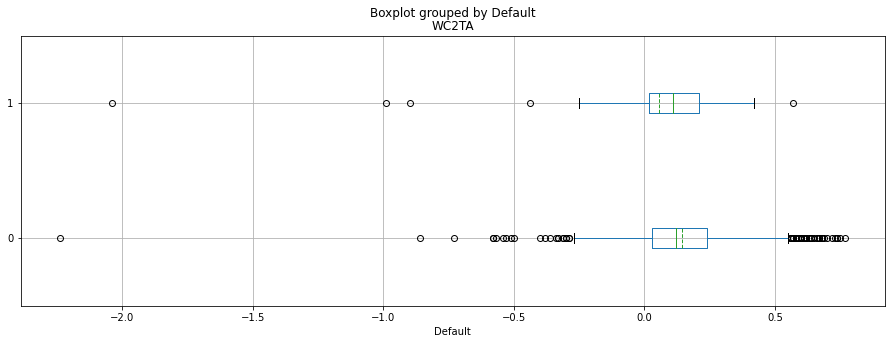

In [ ]:
comp_data.boxplot('WC2TA', by='Default', grid=True, vert=False, meanline=True, showmeans=True, figsize=(15,5))

The variance in WC2TA between default and non-default observations is not significant. However, non-default companies tends to have WC2TA closer to 0. Interestingly, most outliers with WC2TA of less than -0.25 or higher than 0.5 are non-defaut companies.

### RE2TA

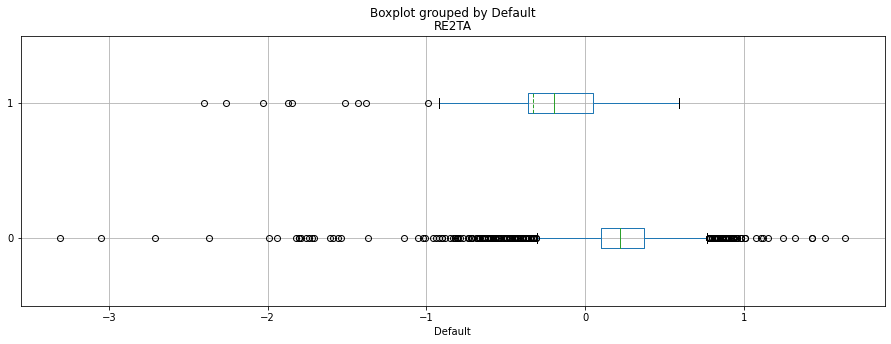

In [ ]:
comp_data.boxplot('RE2TA', by='Default', grid=True, vert=False, meanline=True, showmeans=True, figsize=(15,5))

The difference is quite clear with RE2TA. Default companies tend to have a lower mean of RE2TA, and nearly 75% of them even have negative Retained Earning. Most of non-default companies have a positive RE2TA. However, non-default companies also have a very wide range of RE2TA ratio, especially there are many outliers with RE2TA lower than most default companies. 

### EBIT2TA

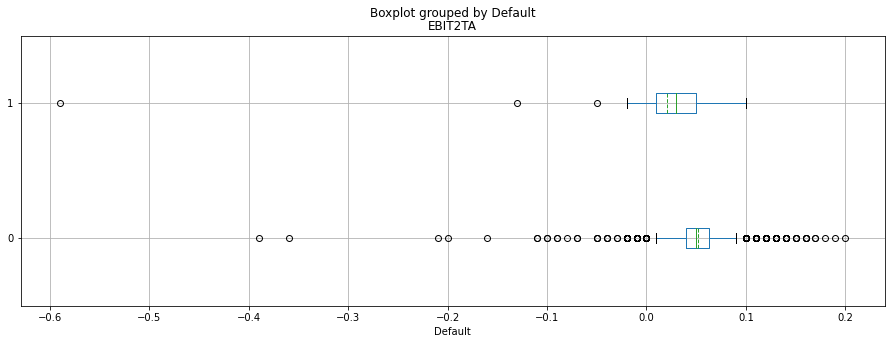

In [ ]:
comp_data.boxplot('EBIT2TA', by='Default', grid=True, vert=False, meanline=True, showmeans=True, figsize=(15,5))

The difference in EBIT2TA is not significant. We can try to have a closer look at the range -0.1 to 0.1 where we have fewer outliers.

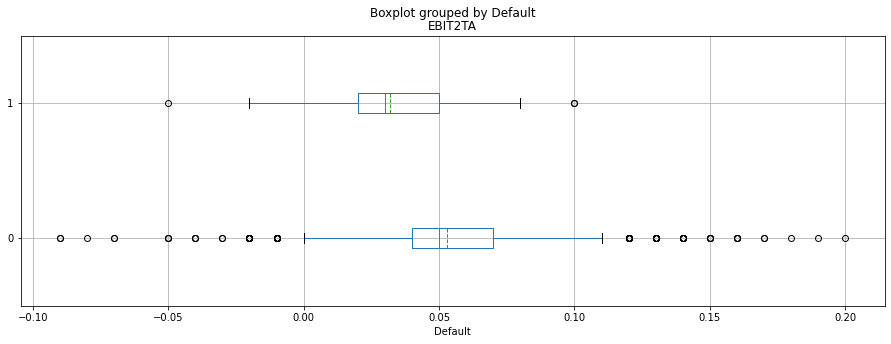

In [ ]:
df_ebitta = comp_data[comp_data['EBIT2TA'] < 0.1]
df_ebitta = comp_data[comp_data['EBIT2TA'] > -0.1]
df_ebitta.boxplot('EBIT2TA', by='Default', grid=True, vert=False, meanline=True, showmeans=True, figsize=(15,5))

Now we can see that non-default companies have a slightly higher EBIT2TA on average, with 50% of those are around 0.04 - 0.06. Meanwhile, 50% of default companies have EBIT2TA in the range of 0.02 - 0.05. The difference is however insignificant.
 

### ME2TL

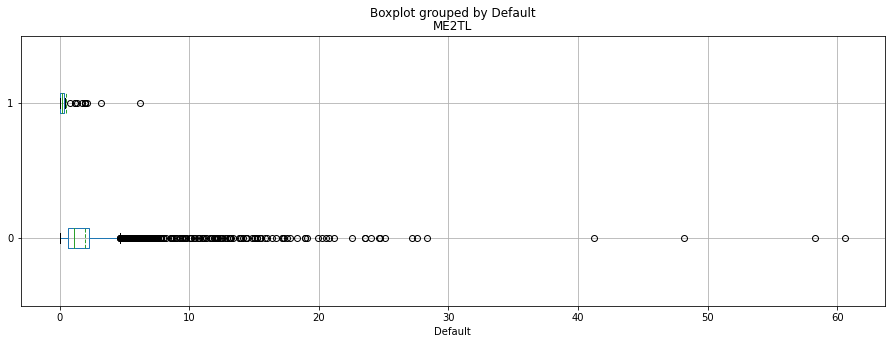

In [ ]:
comp_data.boxplot('ME2TL', by='Default', grid=True, vert=False, figsize=(15,5), showfliers=True, showmeans=True, meanline=True)

Non-default companies usually have higher ME2TL. And if we remove observations where ME2TL > 4, we will have the following boxplot.

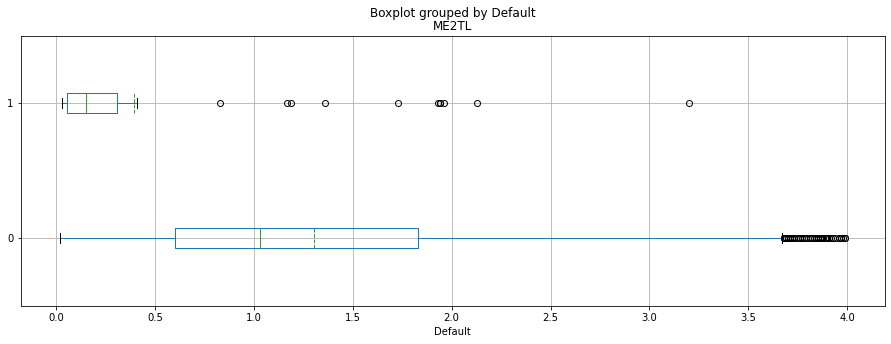

In [ ]:
df1 = comp_data[comp_data['ME2TL']<4]
df1.boxplot('ME2TL', by='Default', grid=True, vert=False, figsize=(15,5), showfliers=True, showmeans=True, meanline=True)

Now it's easier to see that default companies have mush lower ME2TL. Most of them have a ME2TL of lower than 0.4, whereas more than 75% of non-default companies have a ME2TL of higher than 0.6. 

### S2TA

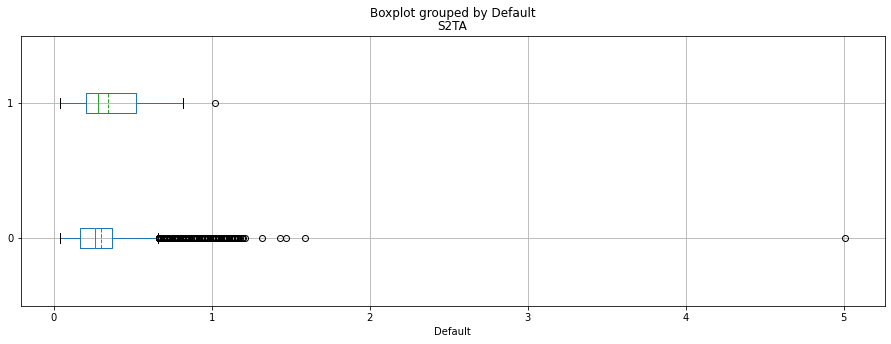

In [ ]:
comp_data.boxplot('S2TA', by='Default', grid=True, vert=False, figsize=(15,5), showfliers=True, showmeans=True, meanline=True)

Let's remove some outliers with S2TA larger than 0.8 to see if we can get a better insight.

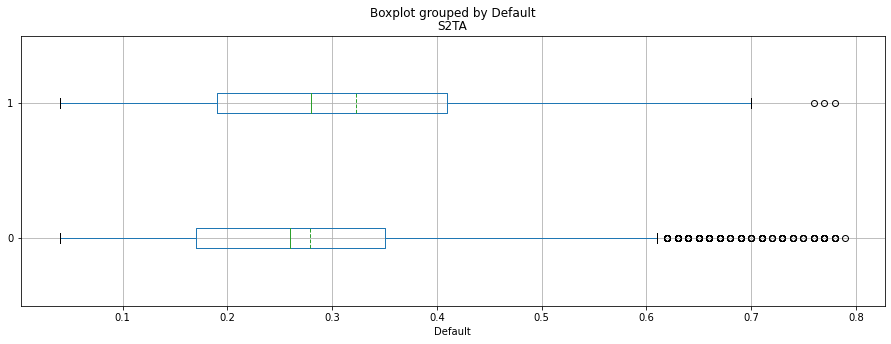

In [ ]:
df_s2ta = comp_data[comp_data['S2TA'] < 0.8]
df_s2ta.boxplot('S2TA', by='Default', grid=True, vert=False, figsize=(15,5), showfliers=True, showmeans=True, meanline=True)

Oftentimes we think that companies with higher sales are doing better, and that's true. But since we are looking at the ratio of Sales over Total assets only rather than over debts or liabilities, it is not sufficient to comment on the company's capacity to pay off its debt.

### Correlations among features

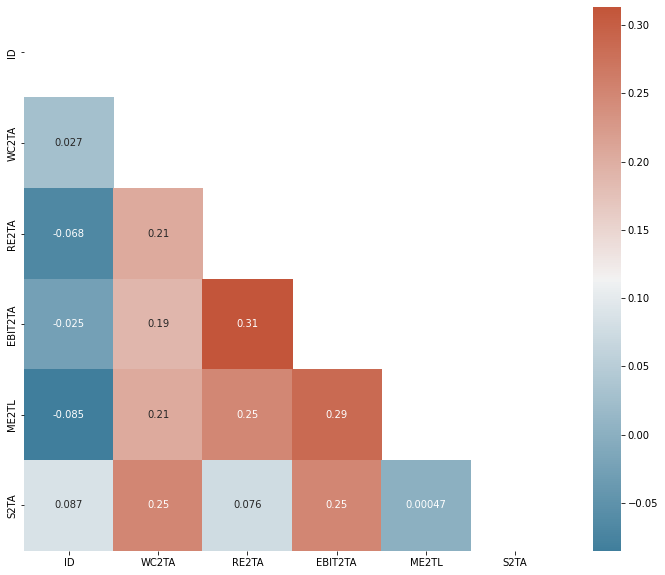

In [ ]:
corr = comp_data.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

* Overall, we do not see any pair of variables that are
highly correlated. The highest correlation is 0.31 only.
* Surprisingly, S2TA has very low correlations with RE2TA and ME2TL. 


### General comments
---


**Based on initial EDA, we have the following findings:**
*   Features with clear difference:
  * ME2TL: the higher, the better.
  * RE2TA: the higher, the better.
*   Features with unclear difference:
  * WC2TA
  * EBIT2TA
  * S2TA

# Step 3. Modeling

## Linear Regression